In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.ar_model import AR, AutoReg
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import r2_score
from statsmodels.tsa.stattools import adfuller

plt.rcParams['figure.figsize']=(20,10)
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('LAB1 - Copy.txt', header=None)
data = df.to_numpy()

data1 = data[:,0]
data2 = data[:,1]
data3 = data[:,2]

In [3]:
def plotData(data, name):
    fig = plt.figure(figsize=(16, 9), dpi=100)
    plt.plot(range(len(data1)), data1, c='blue')
    plt.xlabel('Time')
    plt.ylabel(name)
    plt.title(f'Time series plot for {name}')
    plt.show()

In [4]:
# for i in range(3):
#     plotData(data[:, i], name=f'Dataset {i+1}')

In [5]:
def plt_pred(predictions, actual, name):
    predictions.plot(label='Prediction')
    actual.plot(label='Observed')
    plt.xlabel('Time')
    plt.ylabel(name)
    plt.title(f'Time series plot for {name}')
    plt.legend()
    plt.show()
    print(f"\nr2_score = {r2_score(actual, predictions)}")
    print(f'MSE: {((predictions - actual)**2).mean()}')

# Dataset 1

In [6]:
df[0].head()

0    59.480896
1    61.129656
2    61.274323
3    61.730384
4    63.392172
Name: 0, dtype: float64

In [7]:
def plotter(dataset, name):
    dataset.plot(title=f'Timeseries plot for dataset {name}', figsize=(16, 9), c='blue')
    plt.xlabel('Time')
    plt.ylabel(f'Dataset {name}')
    plt.title(f'Time series plot for {name}')
    plt.show()

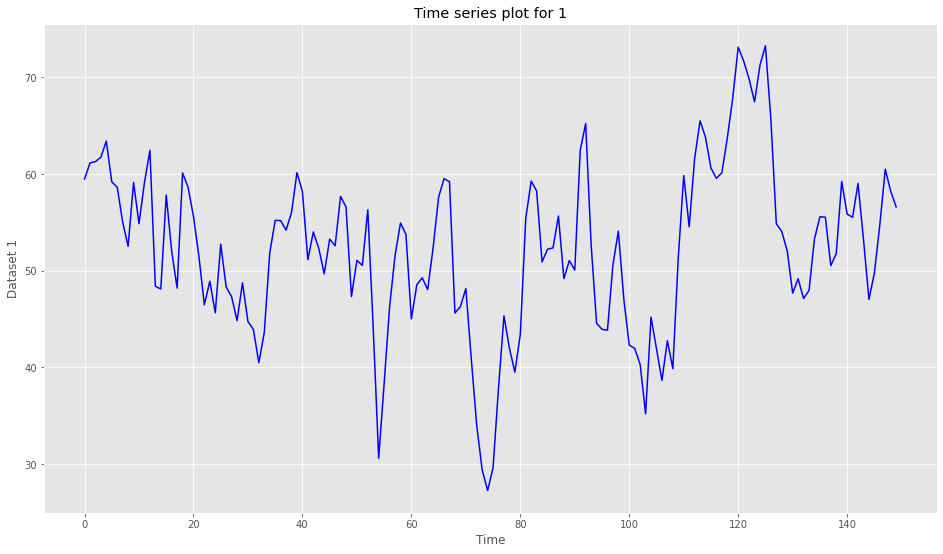

In [8]:
plotter(df[0], 1)

# Dickey-Fuller Test for Stationarity

### $H_O$ = Dataset is non stationary
### $H_A$ = Dataset is stationary

In [9]:
adf_test = adfuller(df[0])
print("ADF = " + str(adf_test[0]))
print("p-value = " +str(adf_test[1]))

ADF = -3.4529583694684955
p-value = 0.009280678094570064


### p-value = 0.009280678094570064 < 0.01 
### Reject the $H_o$ (unit root, non-stationary data) 
### So, assuming data is stationary.

# Autocorrelation

In [10]:
for lag, _ in enumerate(df[0][:-2], 1):
    print(f'For Lag = {lag}, Autocorrelation = {df[0].corr(df[0].shift(lag))}')
    if lag == 20:
        break

For Lag = 1, Autocorrelation = 0.8138239902683847
For Lag = 2, Autocorrelation = 0.6050223352297682
For Lag = 3, Autocorrelation = 0.4963932032073597
For Lag = 4, Autocorrelation = 0.4120256743799933
For Lag = 5, Autocorrelation = 0.36241691932229003
For Lag = 6, Autocorrelation = 0.28692190698019043
For Lag = 7, Autocorrelation = 0.15932044398278467
For Lag = 8, Autocorrelation = 0.07797759990454896
For Lag = 9, Autocorrelation = 0.03017748248010993
For Lag = 10, Autocorrelation = -0.009509694783158513
For Lag = 11, Autocorrelation = -0.05306798608786516
For Lag = 12, Autocorrelation = -0.11489774330957919
For Lag = 13, Autocorrelation = -0.14553685104219818
For Lag = 14, Autocorrelation = -0.13317912979355317
For Lag = 15, Autocorrelation = -0.13012839642669843
For Lag = 16, Autocorrelation = -0.14925004439096265
For Lag = 17, Autocorrelation = -0.15267548906827103
For Lag = 18, Autocorrelation = -0.1286221460302379
For Lag = 19, Autocorrelation = -0.09461362508699112
For Lag = 20, A

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

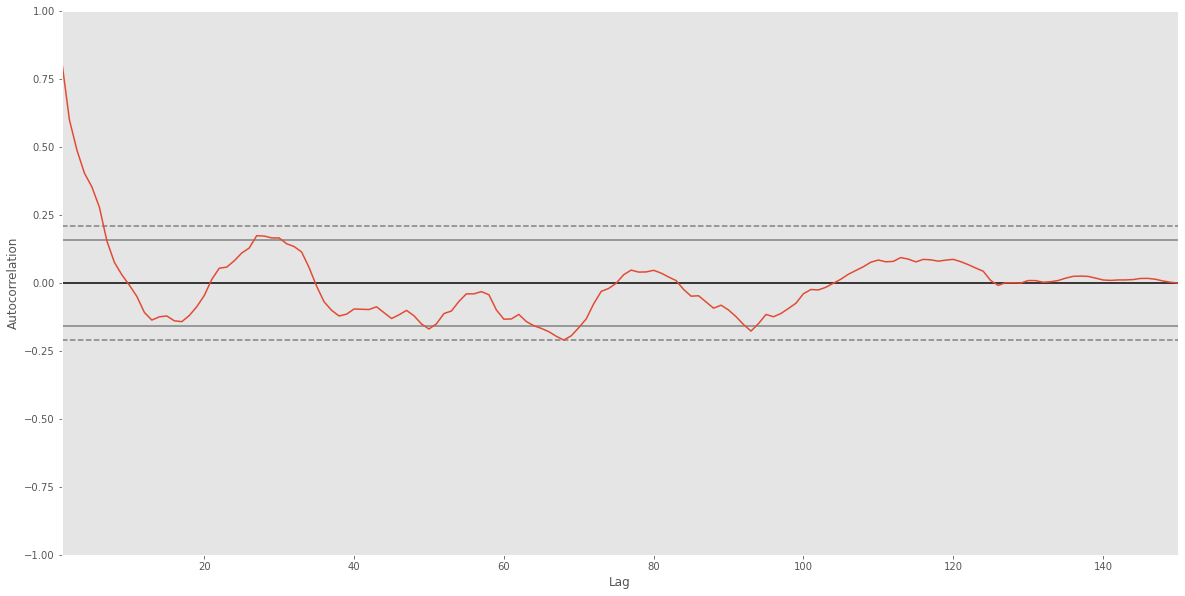

In [11]:
pd.plotting.autocorrelation_plot(df[0])

# Lagplot

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

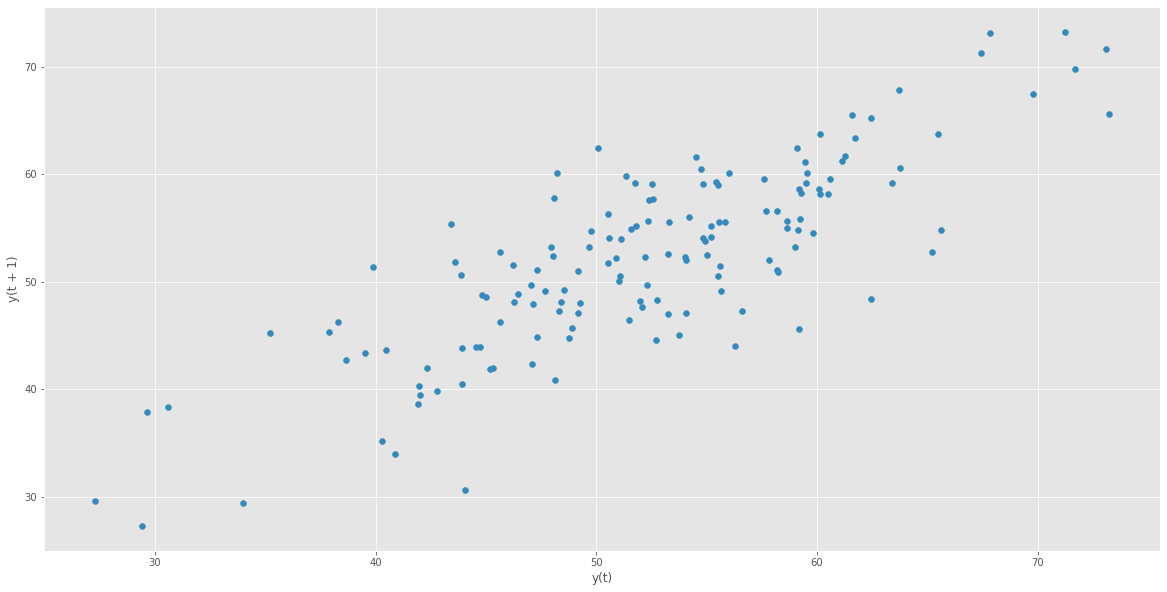

In [12]:
pd.plotting.lag_plot(df[0])

### Dataset is correlated as seen from the above lagplot

# Fitting a model using autoregression, AR(p)

In [25]:
model = ARMA(df[0], order=(0, 6))
model_fitted = model.fit()
print(f'Chosen lag value is: {model_fitted.k_ar}')

c:\users\simanta\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


Chosen lag value is: 0


In [26]:
predictions = model_fitted.predict()

In [27]:
actual = df[0][model_fitted.k_ar:]

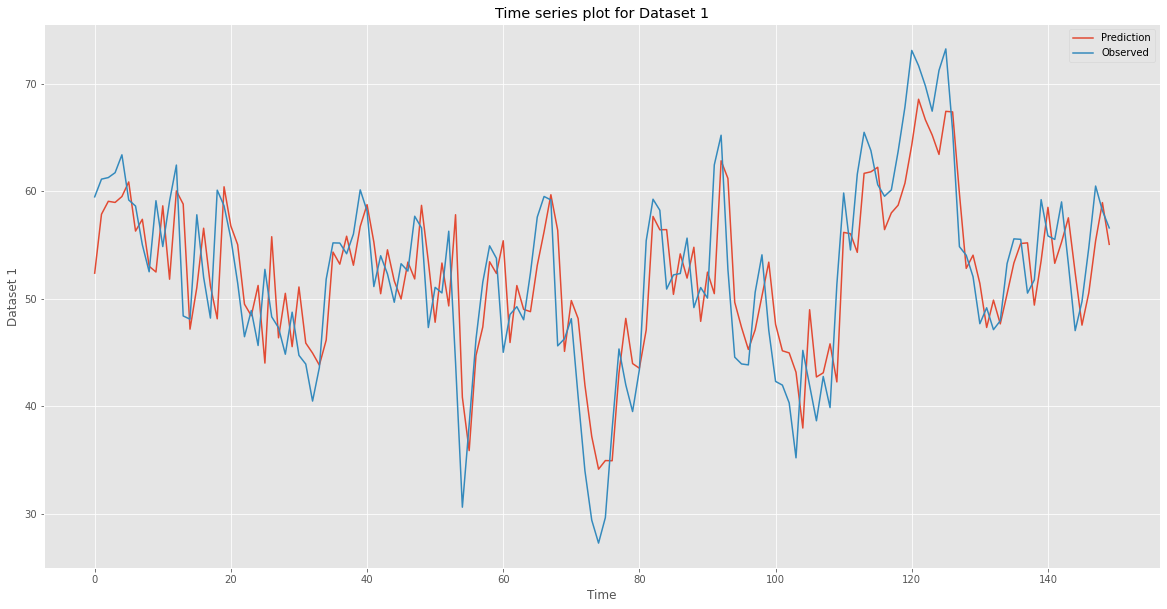


r2_score = 0.6827930307528685
MSE: 23.483763667775403


In [28]:
plt_pred(predictions, actual, name='Dataset 1')

In [29]:
print(f"Coefficients of the model are:\n\n{model_fitted.params}")

Coefficients of the model are:

const      52.380220
ma.L1.y     0.981491
ma.L2.y     0.593520
ma.L3.y     0.452634
ma.L4.y     0.318309
ma.L5.y     0.239466
ma.L6.y     0.216471
dtype: float64


In [30]:
model_fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  150
Model:                     ARMA(0, 6)   Log Likelihood                -449.482
Method:                       css-mle   S.D. of innovations              4.822
Date:                Wed, 05 May 2021   AIC                            914.964
Time:                        23:19:26   BIC                            939.049
Sample:                             0   HQIC                           924.749
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         52.3802      1.478     35.431      0.000      49.483      55.278
ma.L1.y        0.9815      0.083     11.839      0.000       0.819       1.144
ma.L2.y        0.5935      0.113      5.237      0.000       0.371       0.816
ma.L3.y        0.4526      0.111      4.067      0.000       0.234       0.671
ma.L4.y        0.3183      0.103      3.083      0.002       0.116       0.521
ma.L5.y        0.2395      0.109      2.201      0.028       0.026       0.453
ma.L6.y        0.2165      0.077      2.808      0.005       0.065       0.368
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.1059           -0.4543j            1.1956           -0.4380
MA.2           -1.1059           +0.4543j            1.1956            0.4380
MA.3            0.8716           -1.0520j            1.3661           -0.1399
MA.4            0.8716           +1.0520j            1.3661            0.1399
MA.5           -0.3188           -1.2767j            1.3159           -0.2889
MA.6           -0.3188           +1.2767j            1.3159            0.2889
-----------------------------------------------------------------------------
"""

# MA(1)

In [ ]:
from statsmodels.tsa.arima_model import ARMA
model = ARMA(df[0], order=(6, 0))
model_fitted = model.fit()

In [ ]:
predictions = model_fitted.predict()
actual = df[0]
plt_pred(predictions, actual, name='Dataset 1')

In [ ]:
print(f"Coefficients of the model are:\n\n{model_fitted.params}")

In [ ]:
model_fitted.summary()

In [ ]:
model_fitted.resid

In [ ]:
sum(i**2 for i in model_fitted.resid)

In [ ]:
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA', FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA', FutureWarning)

In [ ]:
import itertools
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
plotter(df[0], name='Dataset 1')

In [ ]:
plot_acf(df[0], lags=149)
plot_pacf(df[0], lags=74)
plt.xlabel('lags')
plt.show()

In [ ]:
print(sum(1 for _ in range(20) for __ in range(20) for p in range(2)))

In [ ]:
def arma_comb(data):
    parameters = []
    aic_min = float('inf')
    for p in range(10):
        for q in range(1, 10):
            for r in range(2):
                params = (p, 0, q)
                mod = ARIMA(data, order=params)
                try:
                    results = mod.fit()
                except:
                    continue
                if results.aic < aic_min:
                    parameters = params
    return parameters

In [ ]:
arma_comb(df[0])

In [ ]:
model = ARIMA(df[0], order=(6, 0, 0))
model_fit = model.fit()

In [ ]:
model_fit.summary()

In [ ]:
model_fit.plot_diagnostics()

In [ ]:
model = ARIMA(df[0], order=(0, 1, 2))
model_fit = model.fit()
model_fit.summary()

In [ ]:
model_fit.plot_diagnostics()

In [ ]:
model = ARIMA(df[0], order=(2, 1, 2))
model_fit = model.fit()
model_fit.summary()

In [ ]:
model_fit.plot_diagnostics()

In [ ]:
plt_pred(predictions=model_fit.fittedvalues[1:], actual=df[0][1:], name="Dataset 1")

In [ ]:
model = ARIMA(df[1], order=(0, 1, 1))
model_fit = model.fit()
model_fit.summary()

In [ ]:
ddf = pd.DataFrame(df[2].to_numpy(), columns=['2'])

model1 = ARIMA(ddf['2'], order=(0, 0, 1))
model_fit1 = model1.fit()
model_fit1.summary()

In [ ]:
model_fit1.plot_diagnostics()

In [ ]:
plt_pred(predictions=model_fit1.fittedvalues, actual=df[2], name="Dataset 3")

In [ ]:
ddf = pd.DataFrame(df[1].to_numpy(), columns=['1'])

model1 = ARIMA(ddf['1'], order=(0, 1, 1))
model_fit1 = model1.fit()
model_fit1.summary()

In [ ]:
plt_pred(predictions=model_fit1.fittedvalues[1:], actual=df[1][1:], name="Dataset 2")

In [ ]:
ddf = df.copy()

In [ ]:
import pmdarima as pm
model = pm.auto_arima(df[1], error_action='ignore', trace=0,
                      suppress_warnings=True,
                      seasonal=True, m=12)

model.plot_diagnostics(figsize=(16,9))

In [ ]:
model.summary()

In [ ]:
def plt_pred(predictions, actual, name):
    predictions.plot(label='Prediction')
    actual.plot(label='Observed')
    plt.xlabel('Time')
    plt.ylabel(name)
    plt.title(f'Time series plot for {name}')
    plt.legend()
    plt.show()
    print(f"\nr2_score = {r2_score(actual, predictions)}")
    print(f'MSE: {((predictions.to_numpy() - actual.to_numpy())**2).mean()}')

In [ ]:
preds = pd.DataFrame(model.predict_in_sample(df[1]))
plt_pred(preds[1:], df[1][1:], name='Dataset 2')

In [ ]:
import pmdarima as pm
model = pm.auto_arima(df[0], error_action='ignore', trace=0,
                      suppress_warnings=True,
                      seasonal=True, m=12)

print(model.summary())
model.plot_diagnostics(figsize=(16,9))


In [ ]:
import pmdarima as pm
model = pm.auto_arima(df[1], error_action='ignore', trace=0,
                      suppress_warnings=True,
                      seasonal=True, m=12)

print(model.summary())
model.plot_diagnostics(figsize=(16,9))

In [ ]:
import pmdarima as pm
model = pm.auto_arima(df[2], error_action='ignore', trace=0,
                      suppress_warnings=True,
                      seasonal=False)

model.summary()

In [ ]:
model.plot_diagnostics(figsize=(16,9))

In [ ]:
preds = pd.DataFrame(model.predict_in_sample(df[2]))
plt_pred(preds[1:], df[2][1:], name='Dataset 3')

In [35]:
import statsmodels.api as sm


sns.set()

from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

from scipy.optimize import minimize
import statsmodels.tsa.api as smt
import statsmodels.api as sm

from tqdm import tqdm_notebook

from itertools import product

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

import warnings
warnings.filterwarnings('ignore')


def tsplot(y, lags=None, figsize=(16, 20), syle='bmh'):
    
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style='bmh'):
        fig = plt.figure(figsize=figsize)
        layout = (3,1)
        ts_ax = plt.subplot2grid(layout, (0,0))
        acf_ax = plt.subplot2grid(layout, (1,0))
        pacf_ax = plt.subplot2grid(layout, (2,0))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

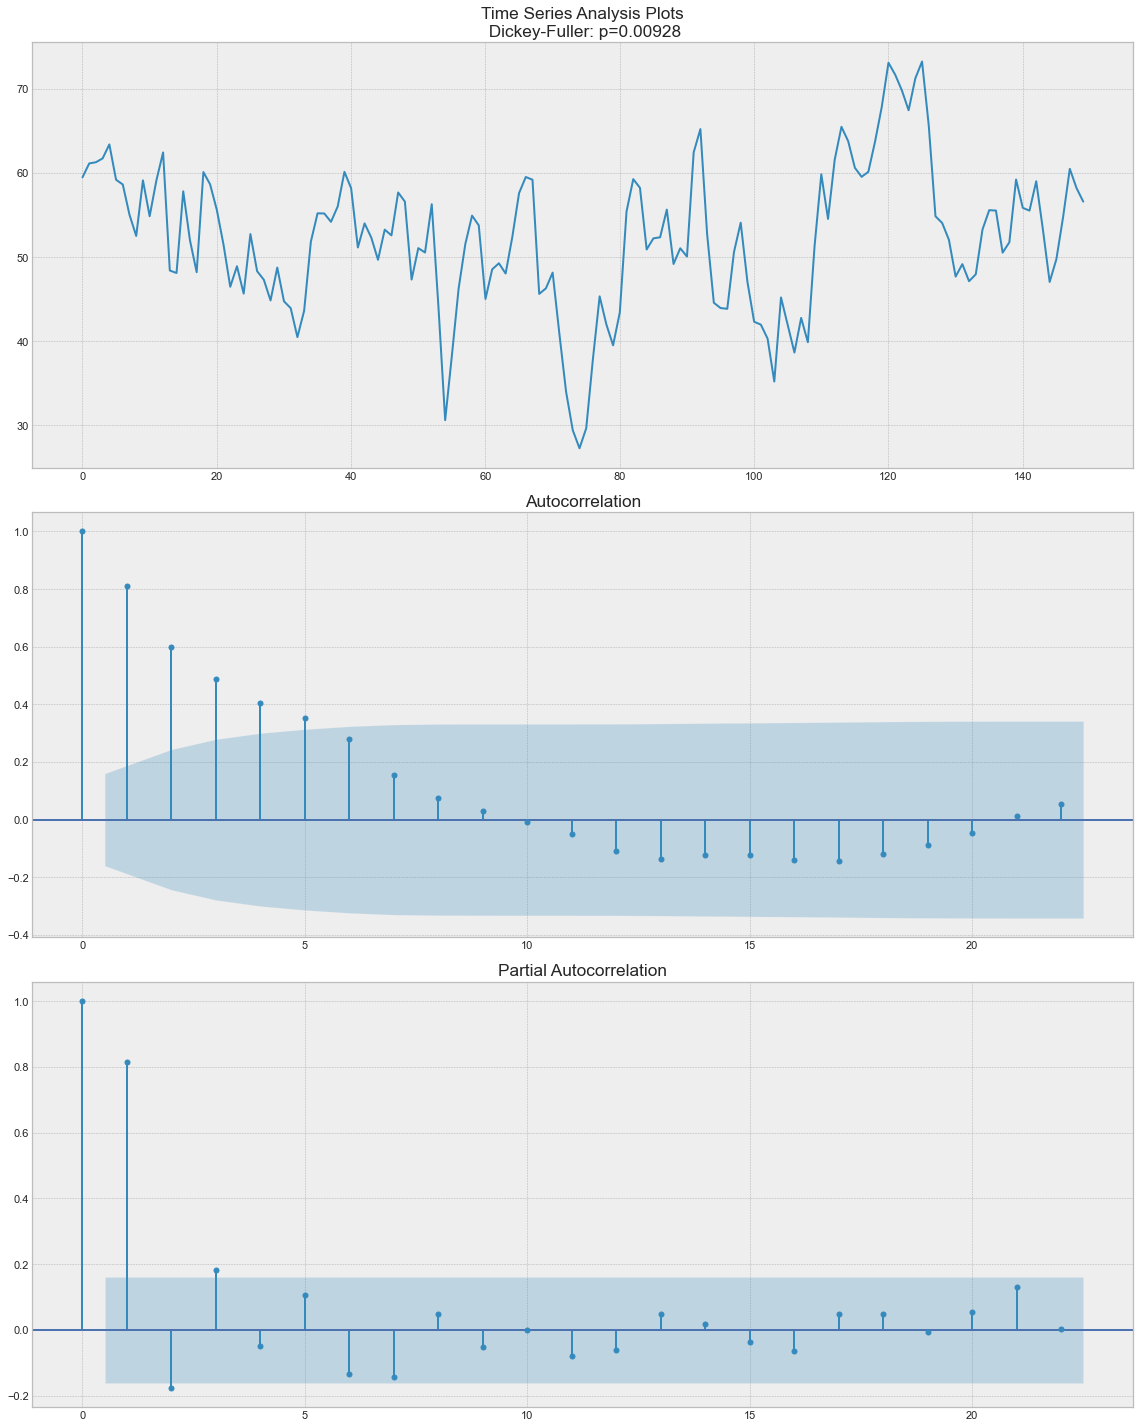

In [36]:
tsplot(df[0])

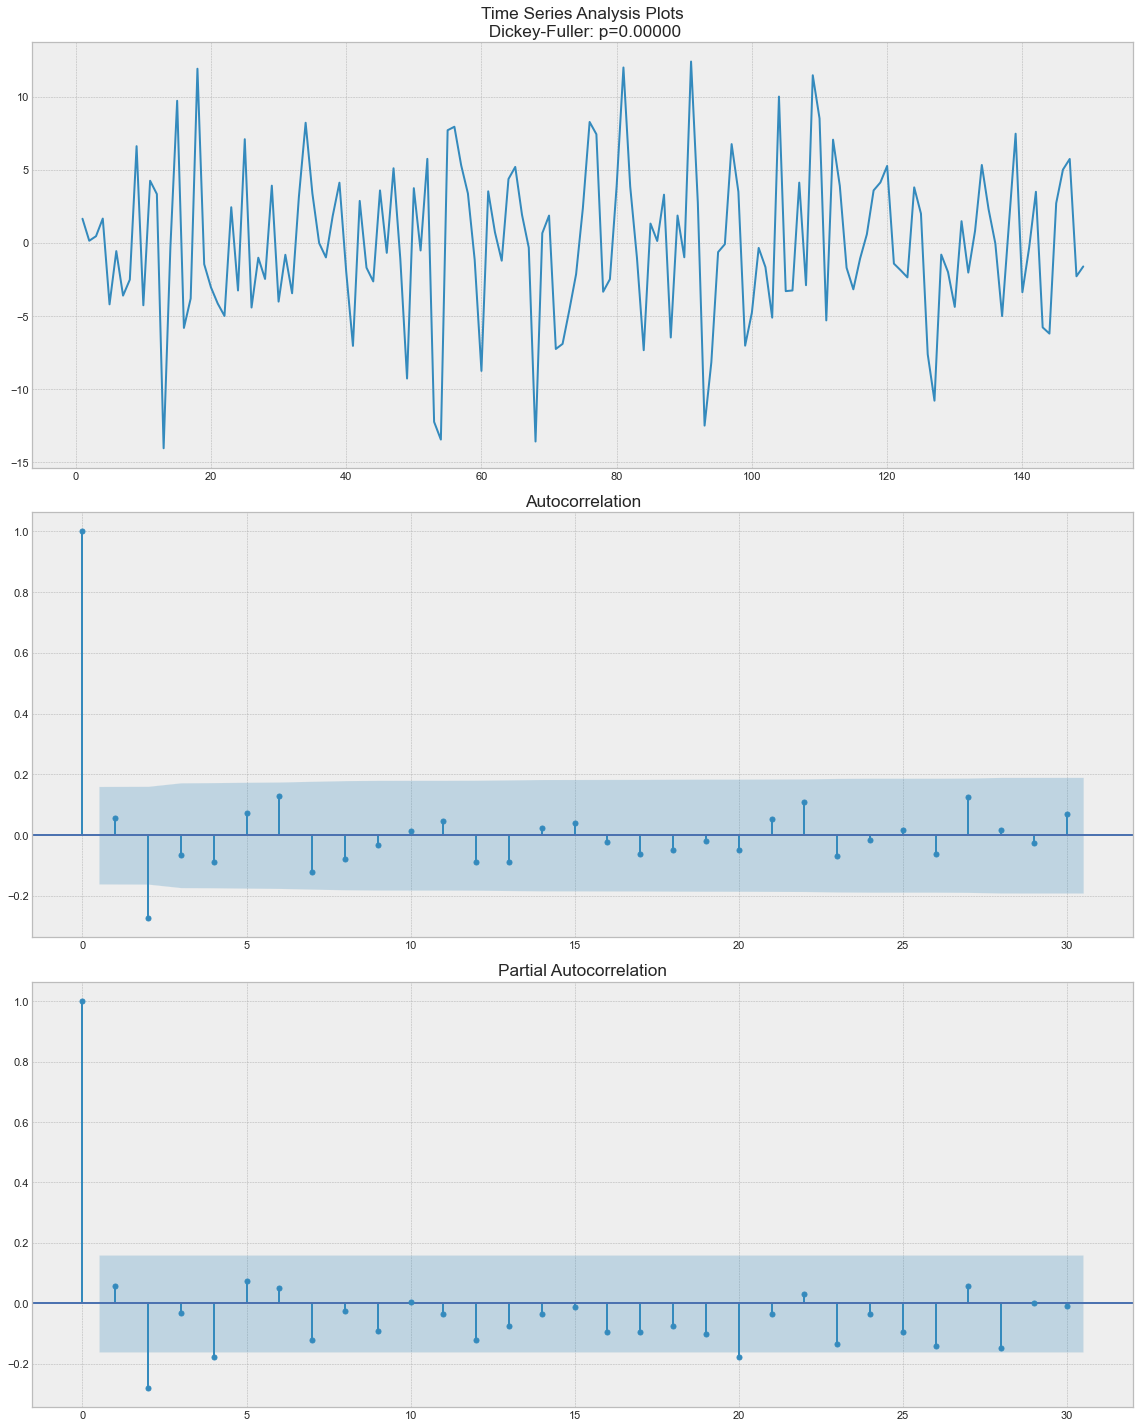

In [37]:
data_diff = df[0] - df[0].shift(1)
tsplot(data_diff[1:], lags=30)

In [45]:
model = ARMA(df[0], order=(0, 1))
model_fitted = model.fit()
model_fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  150
Model:                     ARMA(0, 1)   Log Likelihood                -477.727
Method:                       css-mle   S.D. of innovations              5.830
Date:                Wed, 05 May 2021   AIC                            961.455
Time:                        23:33:17   BIC                            970.486
Sample:                             0   HQIC                           965.124
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         52.2523      0.836     62.477      0.000      50.613      53.892
ma.L1.y        0.7620      0.041     18.739      0.000       0.682       0.842
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.3123           +0.0000j            1.3123            0.5000
-----------------------------------------------------------------------------
"""

In [46]:
model = ARMA(df[0], order=(1, 0))
model_fitted = model.fit()
model_fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  150
Model:                     ARMA(1, 0)   Log Likelihood                -454.787
Method:                       css-mle   S.D. of innovations              5.000
Date:                Wed, 05 May 2021   AIC                            915.574
Time:                        23:36:40   BIC                            924.606
Sample:                             0   HQIC                           919.243
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         52.5294      2.104     24.962      0.000      48.405      56.654
ar.L1.y        0.8112      0.047     17.312      0.000       0.719       0.903
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2328           +0.0000j            1.2328            0.0000
-----------------------------------------------------------------------------
"""

In [48]:
import pmdarima as pm
model = pm.auto_arima(df[0], error_action='ignore', trace=0,
                      suppress_warnings=True)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  150
Model:               SARIMAX(1, 0, 2)   Log Likelihood                -449.549
Date:                Wed, 05 May 2021   AIC                            909.097
Time:                        23:40:27   BIC                            924.151
Sample:                             0   HQIC                           915.213
                                - 150                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      9.1808      4.419      2.077      0.038       0.519      17.842
ar.L1          0.8253      0.085      9.715      0.000       0.659       0.992
ma.L1          0.1682      0.129      1.307      0.191      -0.084       0.420
ma.L2         -0.2116      0.123     -1.717      0.086      -0.453       0.030
sigma2        23.2780      2.843      8.188      0.000      17.706      28.850
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.86
Prob(Q):                              0.97   Prob(JB):                         0.65
Heteroskedasticity (H):               1.00   Skew:                            -0.18
Prob(H) (two-sided):                  0.99   Kurtosis:                         2.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [52]:
model = ARIMA(df[0], order=(1, 0, 2))
model_fitted = model.fit()
model_fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  150
Model:                 ARIMA(1, 0, 2)   Log Likelihood                -449.549
Date:                Wed, 05 May 2021   AIC                            909.097
Time:                        23:44:26   BIC                            924.151
Sample:                             0   HQIC                           915.213
                                - 150                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         52.5591      2.191     23.993      0.000      48.266      56.853
ar.L1          0.8252      0.085      9.710      0.000       0.659       0.992
ma.L1          0.1683      0.129      1.307      0.191      -0.084       0.421
ma.L2         -0.2115      0.123     -1.715      0.086      -0.453       0.030
sigma2        23.2806      2.844      8.187      0.000      17.707      28.854
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.86
Prob(Q):                              0.97   Prob(JB):                         0.65
Heteroskedasticity (H):               1.00   Skew:                            -0.18
Prob(H) (two-sided):                  0.99   Kurtosis:                         2.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

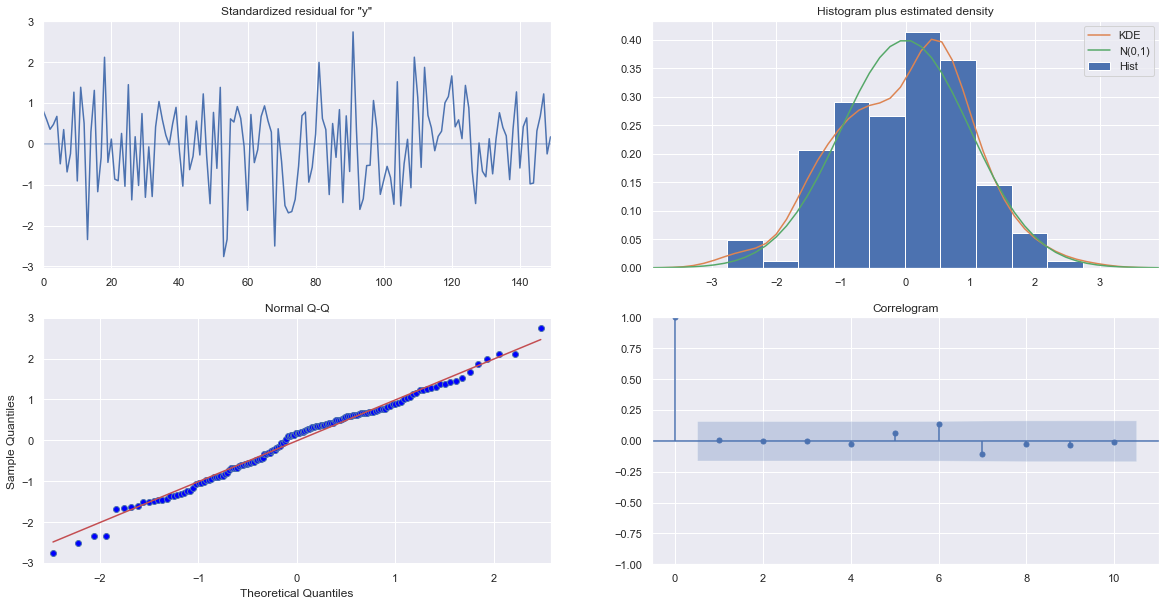

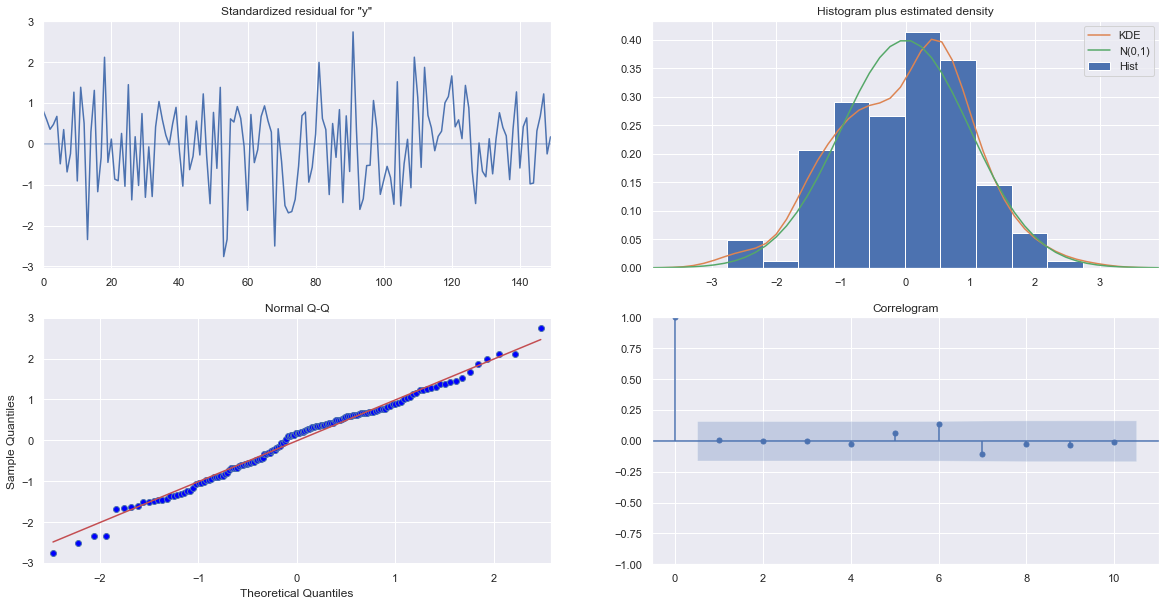

In [53]:
model_fitted.plot_diagnostics()

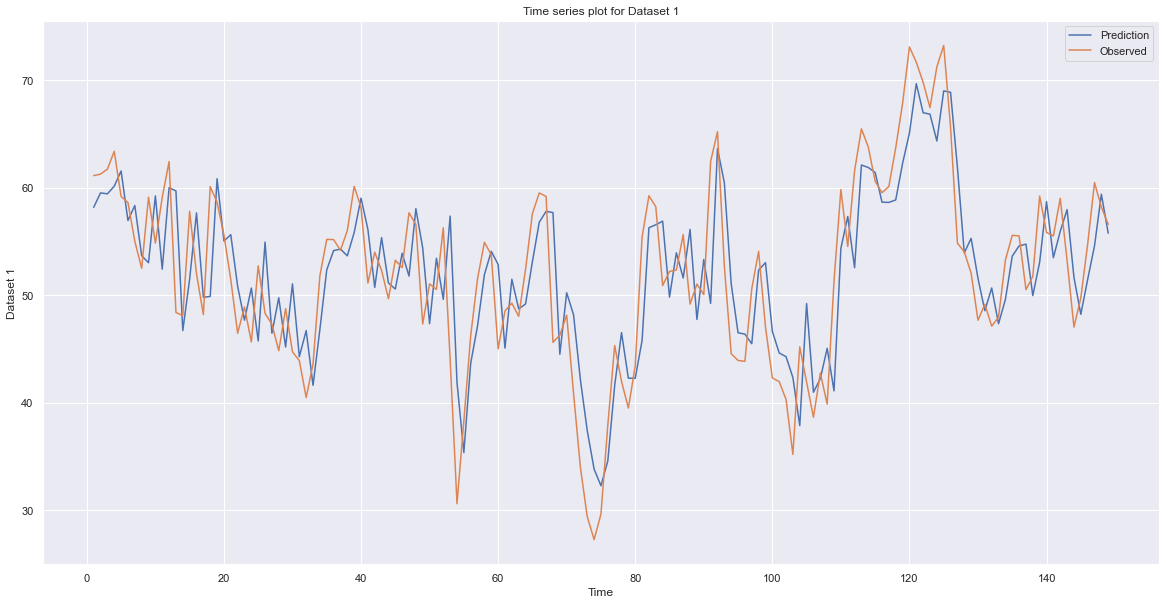


r2_score = 0.6853249968672943
MSE: 23.340393309299138


In [55]:
plt_pred(predictions=model_fitted.fittedvalues[1:], actual=df[0][1:], name="Dataset 1")

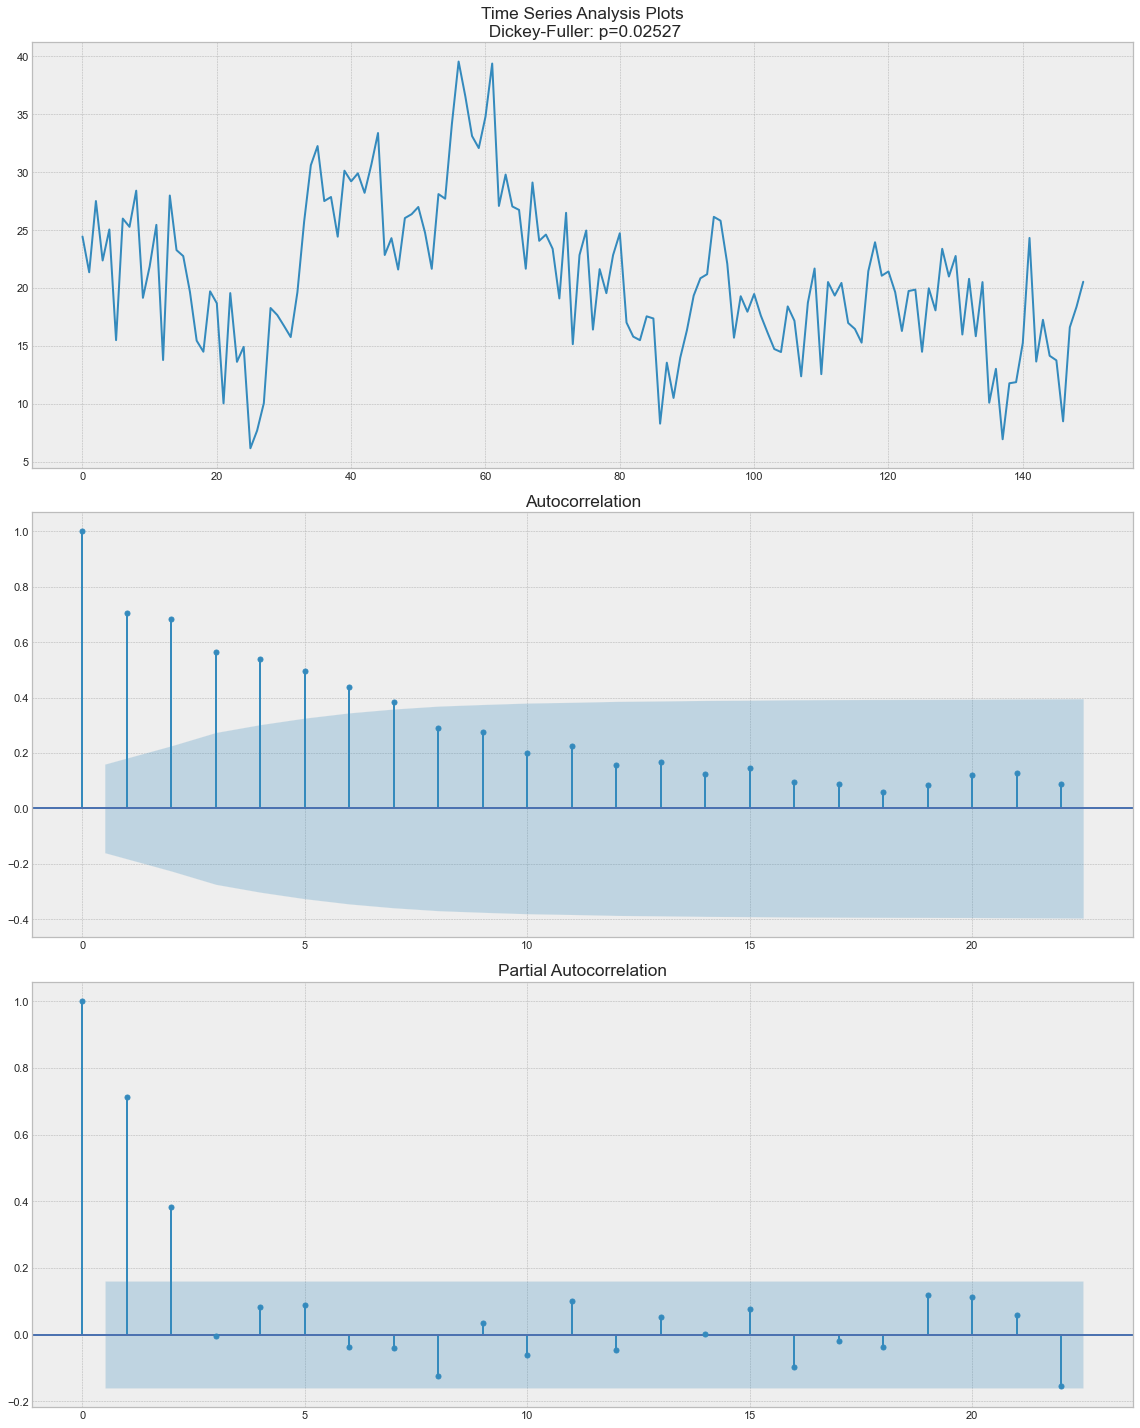

In [57]:
tsplot(df[1])

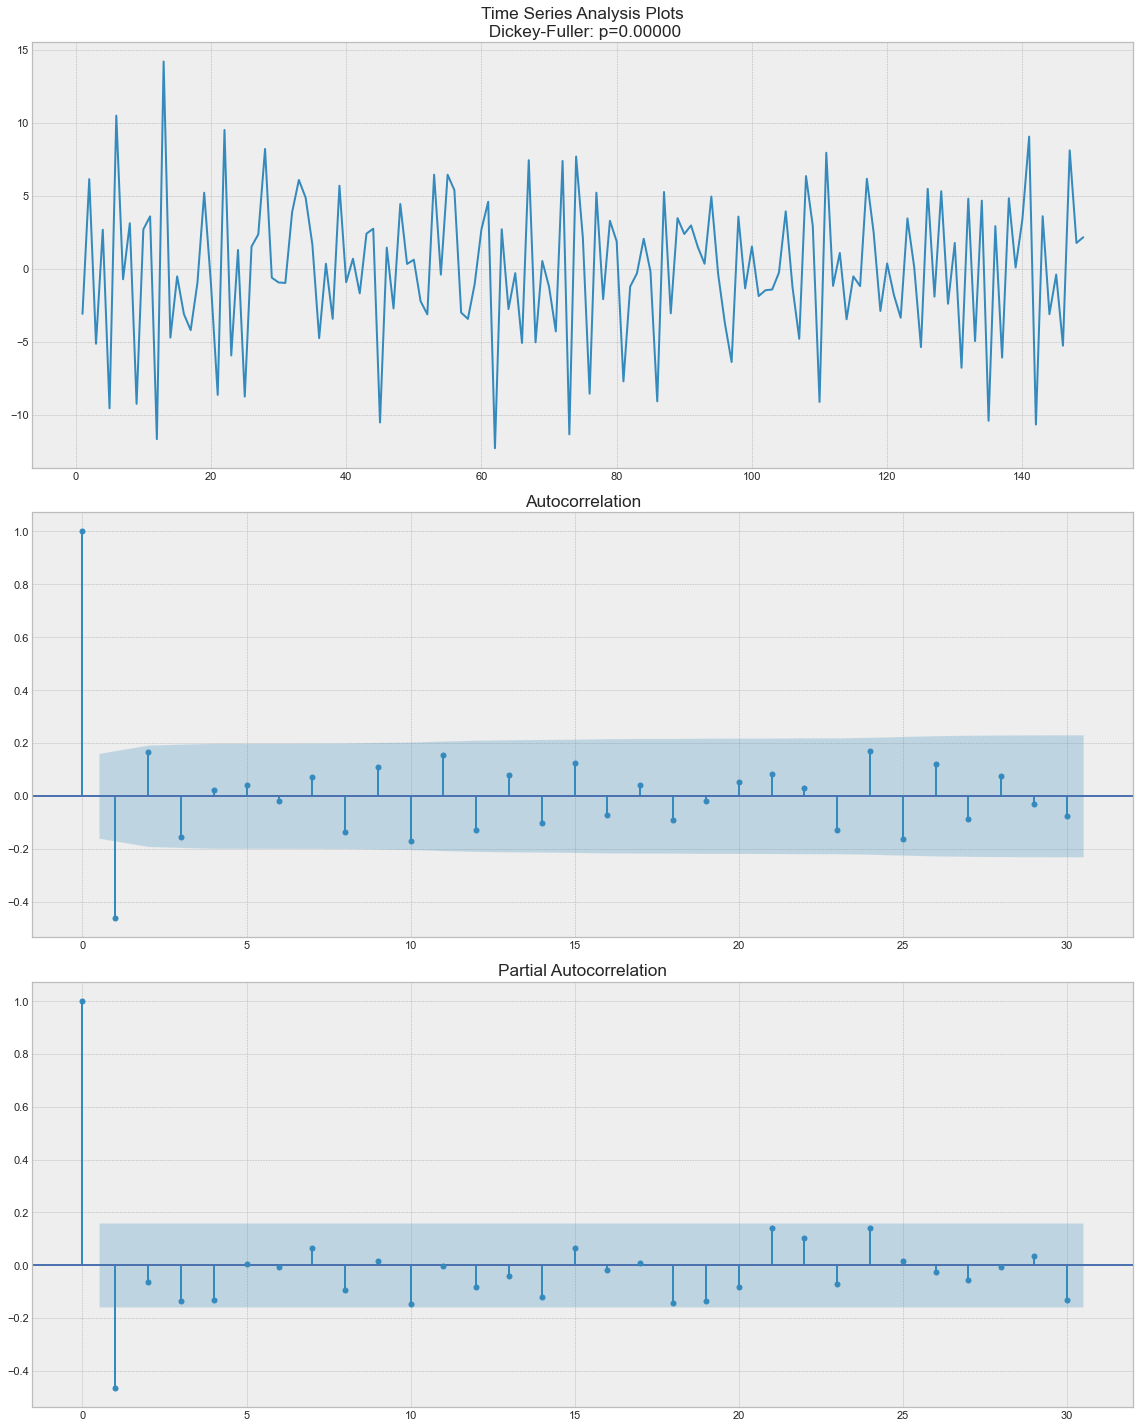

In [58]:
data_diff = df[1] - df[0].shift(1)
tsplot(data_diff[1:], lags=30)

In [59]:
model = ARMA(df[1], order=(0, 2))
model_fitted1 = model.fit()
model_fitted1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      1   No. Observations:                  150
Model:                     ARMA(0, 2)   Log Likelihood                -447.090
Method:                       css-mle   S.D. of innovations              4.757
Date:                Wed, 05 May 2021   AIC                            902.179
Time:                        23:52:38   BIC                            914.222
Sample:                             0   HQIC                           907.072
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.8353      0.757     27.534      0.000      19.352      22.318
ma.L1.1        0.4843      0.078      6.246      0.000       0.332       0.636
ma.L2.1        0.4734      0.064      7.390      0.000       0.348       0.599
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -0.5115           -1.3604j            1.4533           -0.3072
MA.2           -0.5115           +1.3604j            1.4533            0.3072
-----------------------------------------------------------------------------
"""

In [60]:
model = ARMA(df[1], order=(2, 0))
model_fitted1 = model.fit()
model_fitted1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      1   No. Observations:                  150
Model:                     ARMA(2, 0)   Log Likelihood                -430.418
Method:                       css-mle   S.D. of innovations              4.252
Date:                Wed, 05 May 2021   AIC                            868.837
Time:                        23:54:05   BIC                            880.879
Sample:                             0   HQIC                           873.729
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.8946      1.752     11.926      0.000      17.461      24.328
ar.L1.1        0.4416      0.075      5.859      0.000       0.294       0.589
ar.L2.1        0.3680      0.075      4.883      0.000       0.220       0.516
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1543           +0.0000j            1.1543            0.0000
AR.2           -2.3544           +0.0000j            2.3544            0.5000
-----------------------------------------------------------------------------
"""

In [61]:
model1 = pm.auto_arima(df[1], error_action='ignore', trace=0, suppress_warnings=True)
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  150
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -431.851
Date:                Wed, 05 May 2021   AIC                            867.701
Time:                        23:55:40   BIC                            873.709
Sample:                             0   HQIC                           870.142
                                - 150                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5099      0.069     -7.344      0.000      -0.646      -0.374
sigma2        19.2360      2.427      7.924      0.000      14.478      23.994
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                 1.18
Prob(Q):                              0.75   Prob(JB):                         0.55
Heteroskedasticity (H):               0.68   Skew:                            -0.15
Prob(H) (two-sided):                  0.18   Kurtosis:                         2.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [65]:
ddf = pd.DataFrame()
ddf[0] = df[1]

model = ARIMA(ddf[0], order=(0, 1, 1))
model_fitted1 = model.fit()
model_fitted1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  150
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -431.851
Date:                Wed, 05 May 2021   AIC                            867.701
Time:                        23:59:53   BIC                            873.709
Sample:                             0   HQIC                           870.142
                                - 150                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5099      0.069     -7.344      0.000      -0.646      -0.374
sigma2        19.2360      2.427      7.924      0.000      14.478      23.994
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                 1.18
Prob(Q):                              0.75   Prob(JB):                         0.55
Heteroskedasticity (H):               0.68   Skew:                            -0.15
Prob(H) (two-sided):                  0.18   Kurtosis:                         2.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

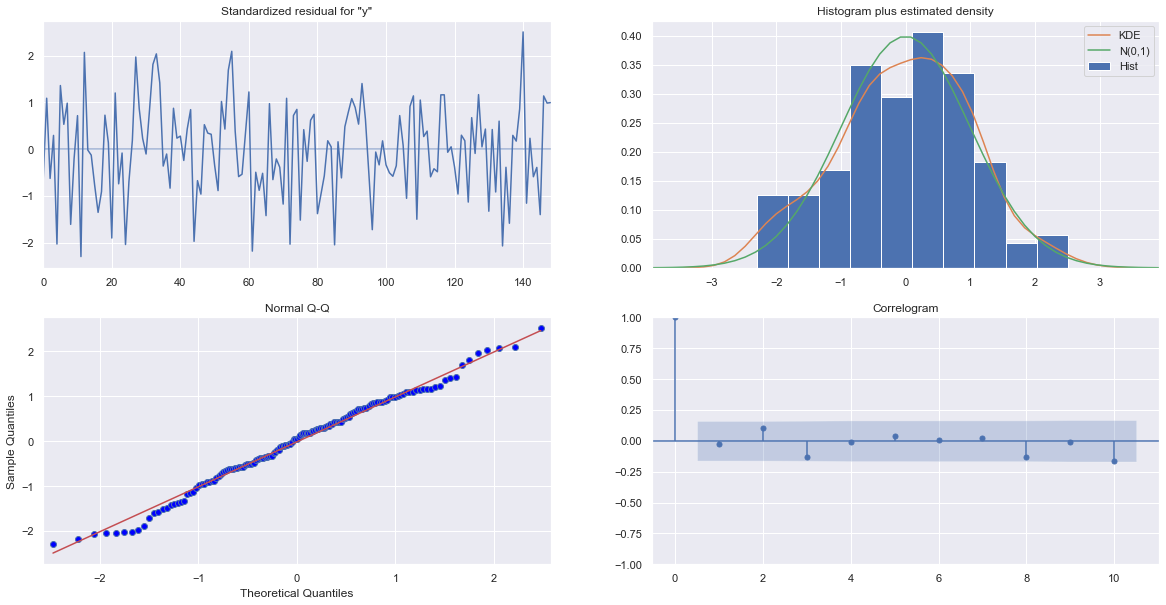

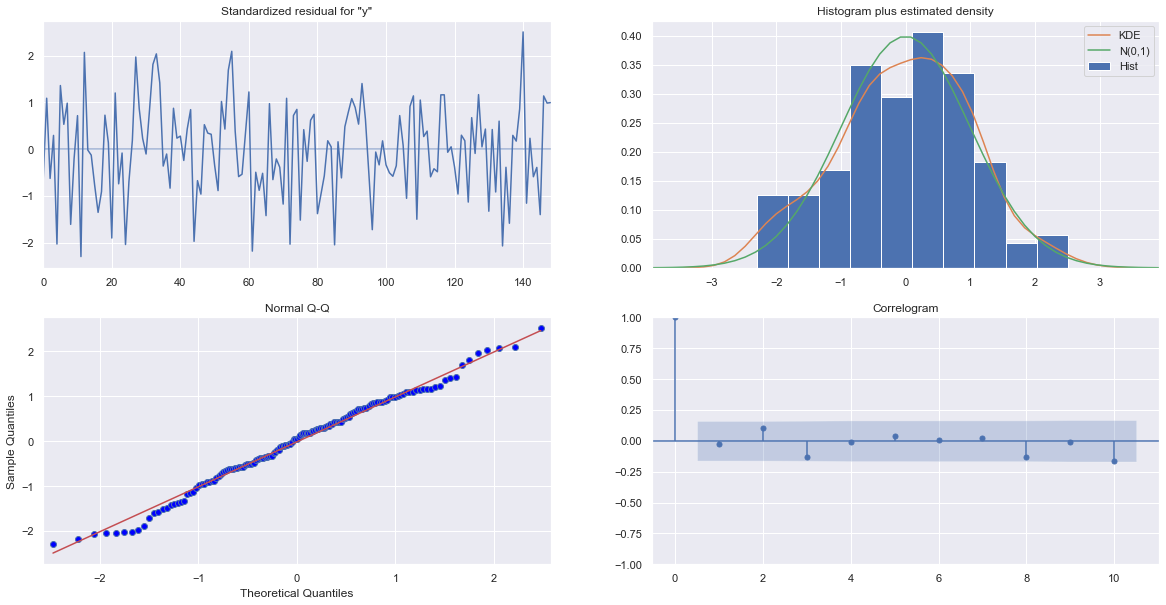

In [66]:
model_fitted1.plot_diagnostics()

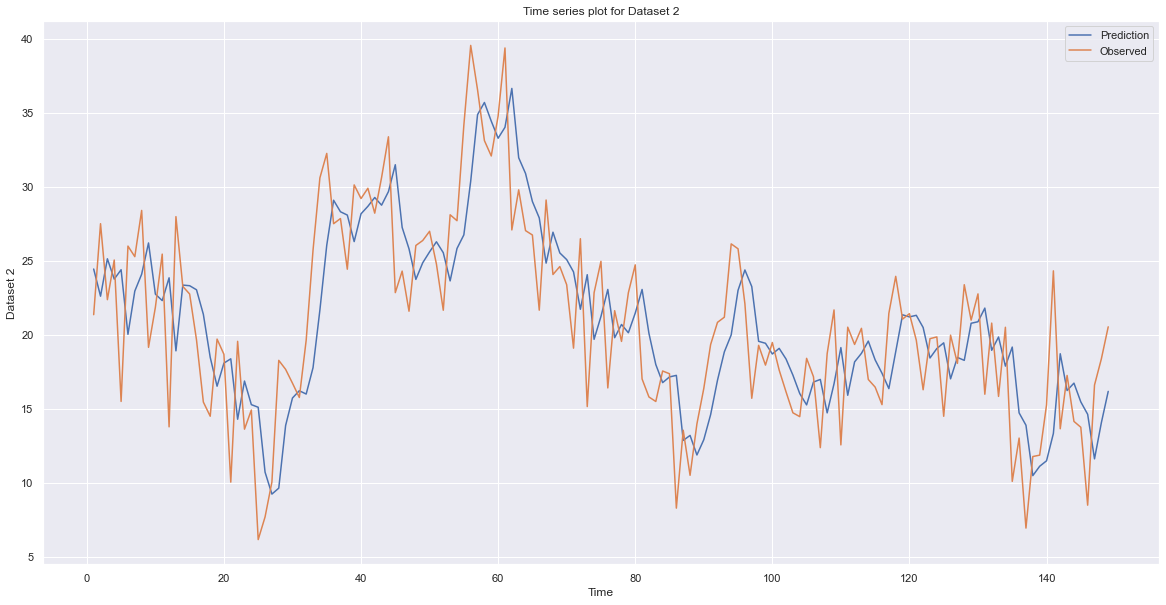


r2_score = 0.5435097960968411
MSE: 19.258074874890706


In [67]:
plt_pred(predictions=model_fitted1.fittedvalues[1:], actual=df[1][1:], name="Dataset 2")

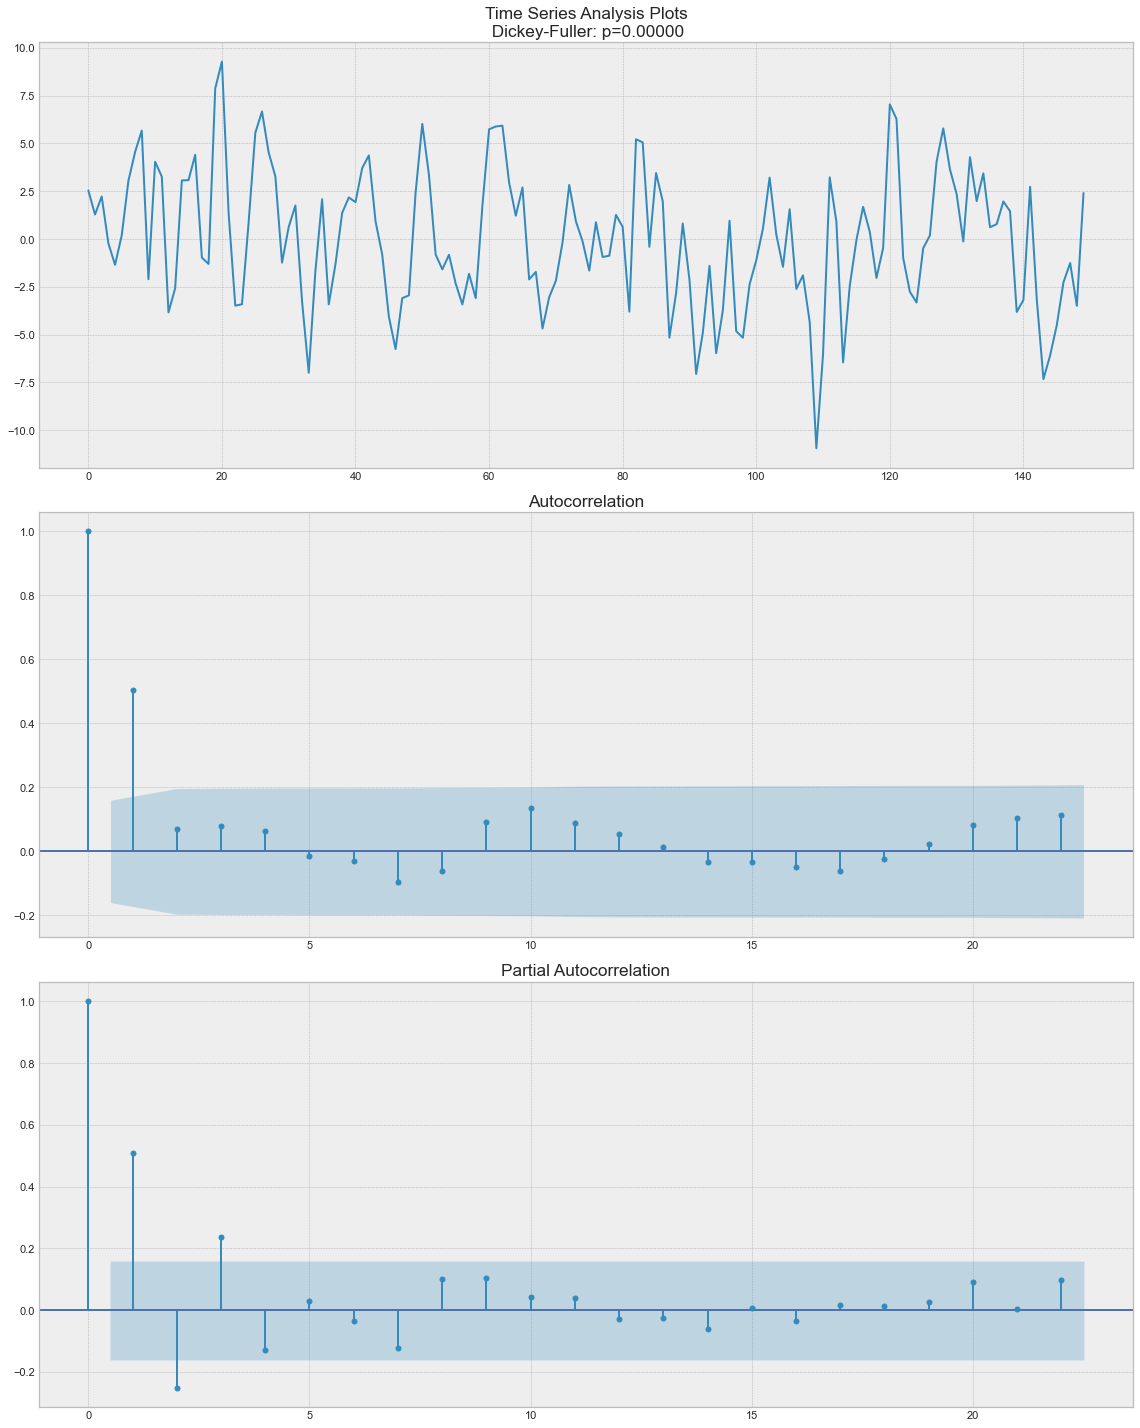

In [68]:
tsplot(df[2])

In [69]:
model = ARMA(df[2], order=(0, 2))
model_fitted1 = model.fit()
model_fitted1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      2   No. Observations:                  150
Model:                     ARMA(0, 2)   Log Likelihood                -370.917
Method:                       css-mle   S.D. of innovations              2.863
Date:                Thu, 06 May 2021   AIC                            749.834
Time:                        00:05:04   BIC                            761.877
Sample:                             0   HQIC                           754.727
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0448      0.423      0.106      0.916      -0.785       0.875
ma.L1.2        0.7370      0.086      8.618      0.000       0.569       0.905
ma.L2.2        0.0804      0.083      0.974      0.330      -0.081       0.242
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.6559           +0.0000j            1.6559            0.5000
MA.2           -7.5119           +0.0000j            7.5119            0.5000
-----------------------------------------------------------------------------
"""

In [70]:
model = ARMA(df[2], order=(4, 0))
model_fitted1 = model.fit()
model_fitted1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      2   No. Observations:                  150
Model:                     ARMA(4, 0)   Log Likelihood                -369.945
Method:                       css-mle   S.D. of innovations              2.844
Date:                Thu, 06 May 2021   AIC                            751.890
Time:                        00:05:39   BIC                            769.954
Sample:                             0   HQIC                           759.229
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0497      0.432      0.115      0.908      -0.796       0.896
ar.L1.2        0.7348      0.082      8.997      0.000       0.575       0.895
ar.L2.2       -0.4705      0.098     -4.788      0.000      -0.663      -0.278
ar.L3.2        0.3407      0.098      3.481      0.000       0.149       0.533
ar.L4.2       -0.1416      0.081     -1.741      0.082      -0.301       0.018
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.3314           -1.4941j            1.5304           -0.2847
AR.2           -0.3314           +1.4941j            1.5304            0.2847
AR.3            1.5350           -0.8126j            1.7368           -0.0775
AR.4            1.5350           +0.8126j            1.7368            0.0775
-----------------------------------------------------------------------------
"""

In [71]:
model1 = pm.auto_arima(df[2], error_action='ignore', trace=0, suppress_warnings=True)
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  150
Model:               SARIMAX(0, 0, 1)   Log Likelihood                -371.399
Date:                Thu, 06 May 2021   AIC                            746.797
Time:                        00:06:44   BIC                            752.819
Sample:                             0   HQIC                           749.244
                                - 150                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.6777      0.060     11.372      0.000       0.561       0.794
sigma2         8.2483      0.969      8.513      0.000       6.349      10.147
===================================================================================
Ljung-Box (L1) (Q):                   0.47   Jarque-Bera (JB):                 0.14
Prob(Q):                              0.50   Prob(JB):                         0.93
Heteroskedasticity (H):               1.01   Skew:                             0.07
Prob(H) (two-sided):                  0.97   Kurtosis:                         2.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [72]:
ddf = pd.DataFrame()
ddf[0] = df[2]

model = ARIMA(ddf[0], order=(0, 0, 1))
model_fitted1 = model.fit()
model_fitted1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  150
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -371.394
Date:                Thu, 06 May 2021   AIC                            748.787
Time:                        00:08:03   BIC                            757.819
Sample:                             0   HQIC                           752.457
                                - 150                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0397      0.398      0.100      0.920      -0.740       0.820
ma.L1          0.6777      0.060     11.233      0.000       0.559       0.796
sigma2         8.2478      0.971      8.498      0.000       6.346      10.150
===================================================================================
Ljung-Box (L1) (Q):                   0.46   Jarque-Bera (JB):                 0.14
Prob(Q):                              0.50   Prob(JB):                         0.93
Heteroskedasticity (H):               1.02   Skew:                             0.07
Prob(H) (two-sided):                  0.96   Kurtosis:                         2.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

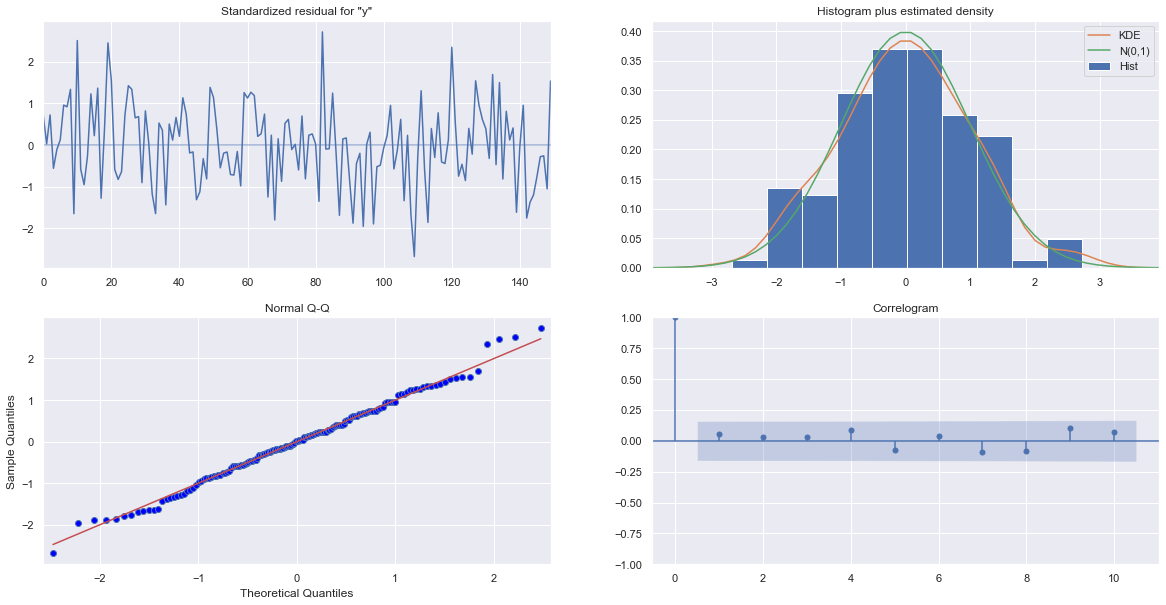

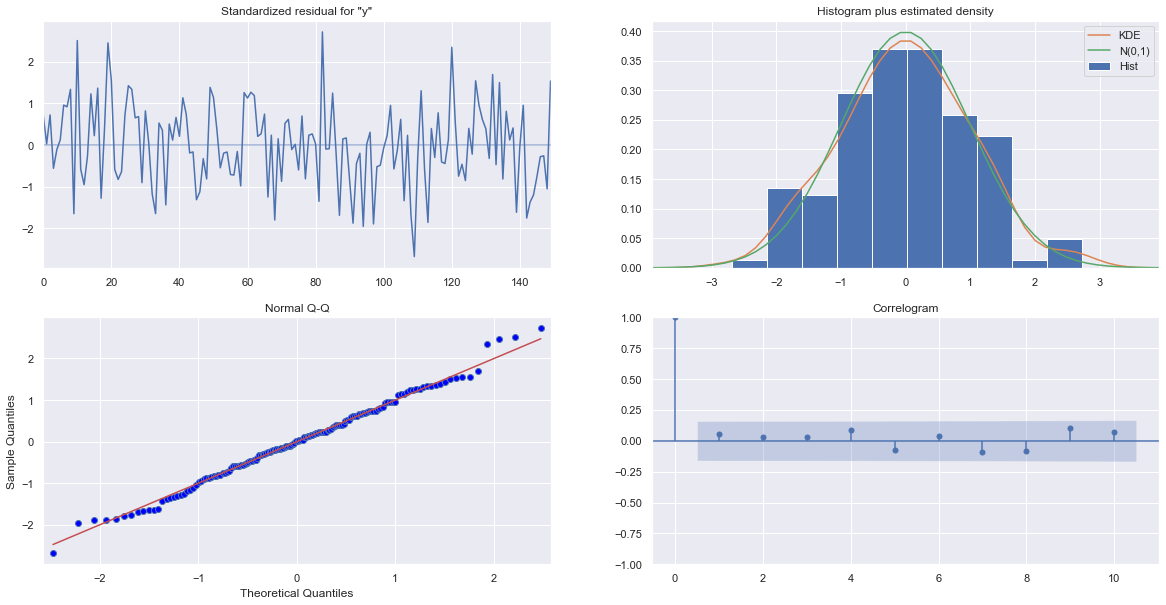

In [73]:
model_fitted1.plot_diagnostics()

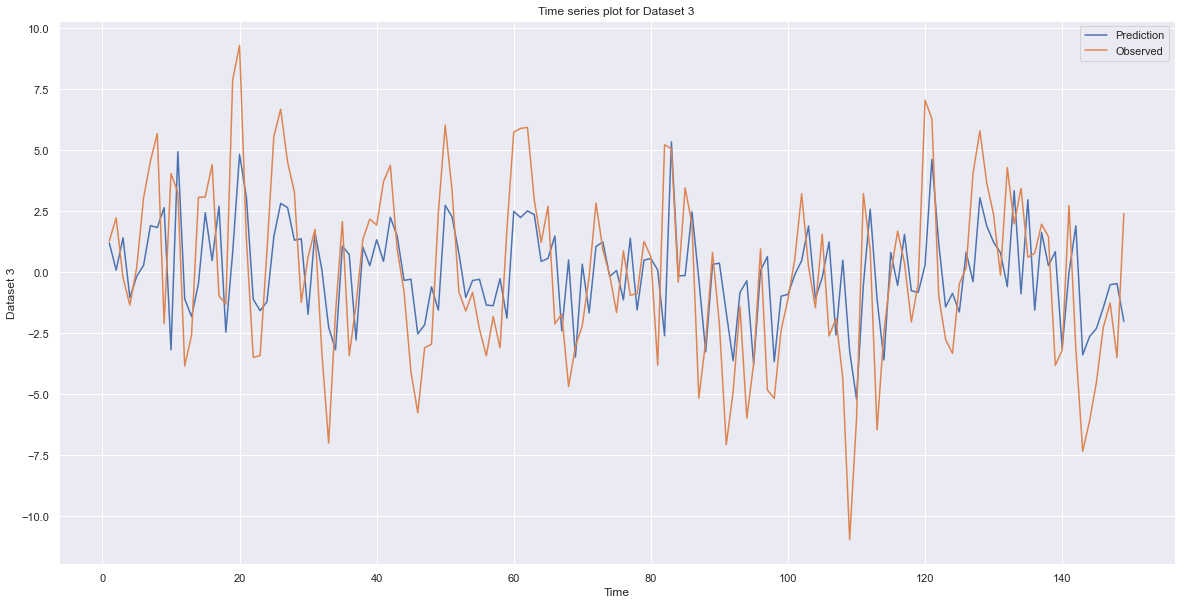


r2_score = 0.3453800654071103
MSE: 8.276668128762342


In [74]:
plt_pred(predictions=model_fitted1.fittedvalues[1:], actual=df[2][1:], name="Dataset 3")